In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
sns.set()  # Used for styling
#plt.style.use('ggplot') # Used for styling

In [200]:
csv_file1 = pd.read_csv("student-mat.csv", sep=";")
csv_file1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [201]:
df = csv_file1
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# ADD / DROP

# Delete the rows where G3 == 0

In [212]:
df = df[df.G3 != 0] # Removing Outliers

In [202]:
df.loc[:,"G1+G2"] = df.loc[:,"G1"] + df.loc[:,"G2"]
df.loc[:,"G1XG2"] = df.loc[:,"G1"] * df.loc[:,"G2"]
df.loc[:,"Avg"] = round((df.loc[:,"G1"] + df.loc[:,"G2"])//2)
df.loc[:,"MeduXFedu"] = (df.loc[:,"Medu"] * df.loc[:,"Fedu"])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

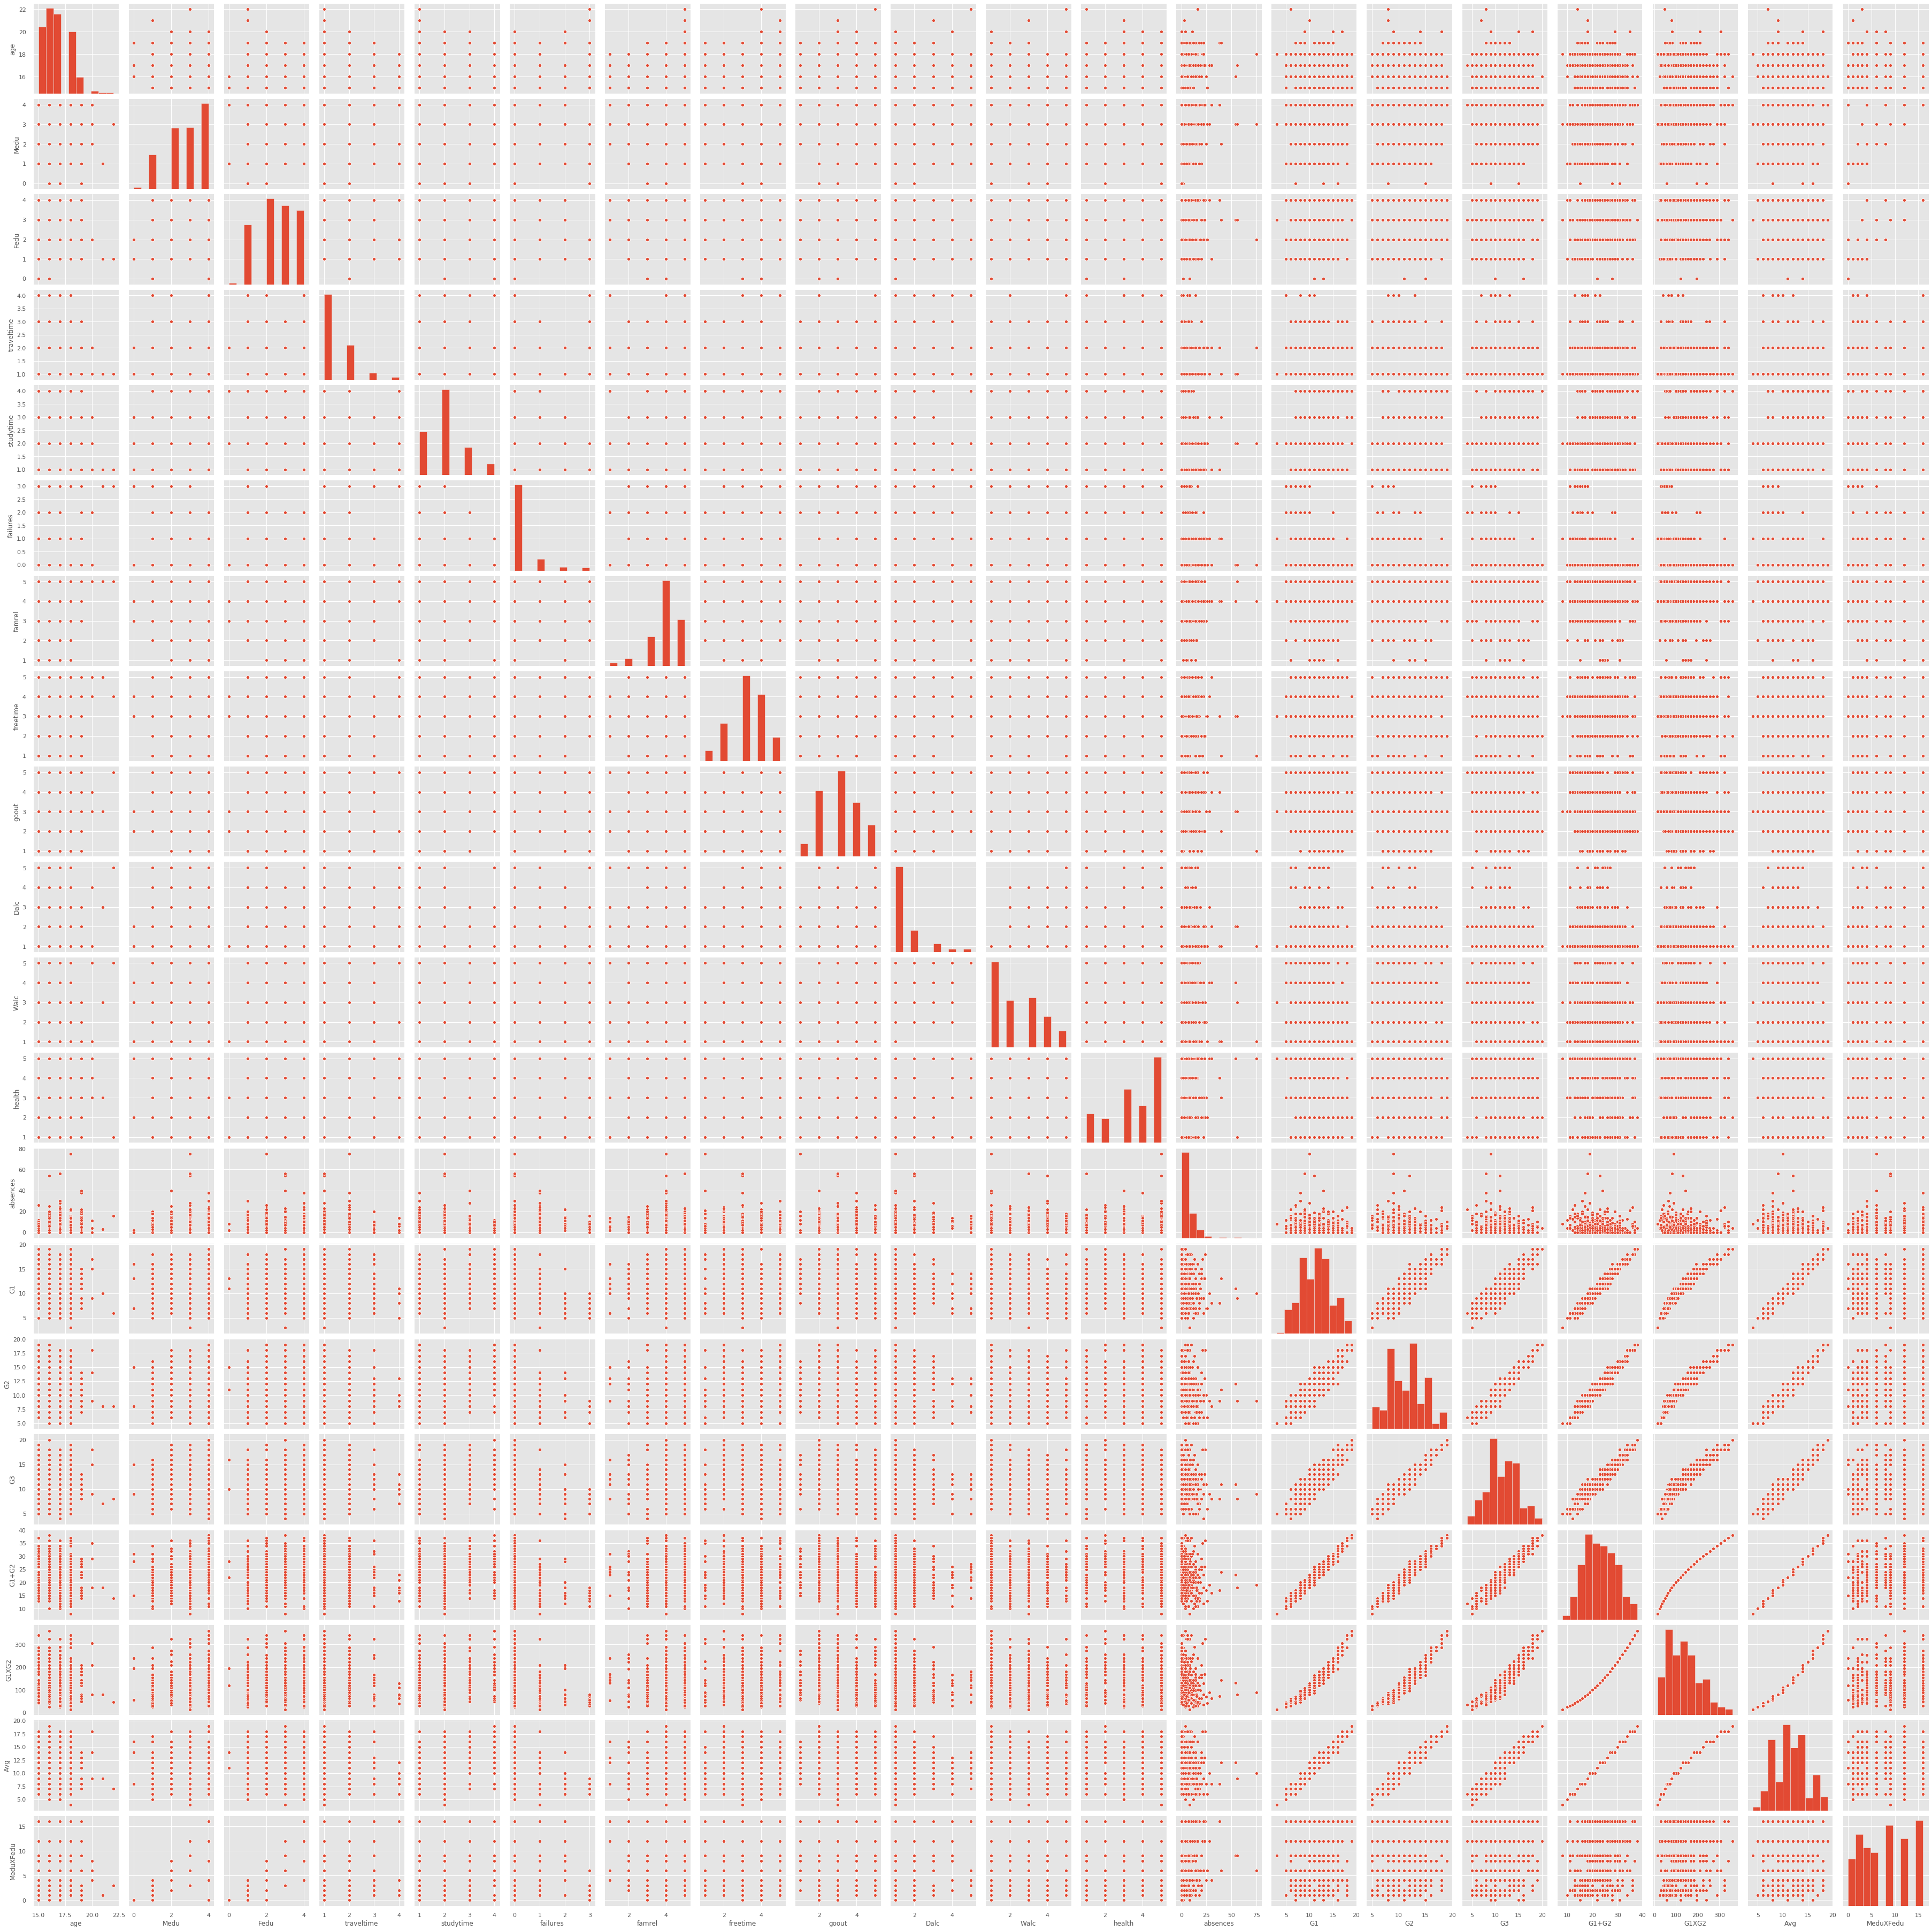

In [50]:
sns.pairplot(df)

In [206]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1+G2,G1XG2,Avg,MeduXFedu
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,21.622785,127.488608,10.569620,7.673418
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,6.814957,76.515230,3.426841,5.190012
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,4.000000,0.000000,2.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,17.000000,72.000000,8.000000,3.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,22.000000,120.000000,11.000000,6.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,26.000000,169.000000,13.000000,12.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,38.000000,361.000000,19.000000,16.000000


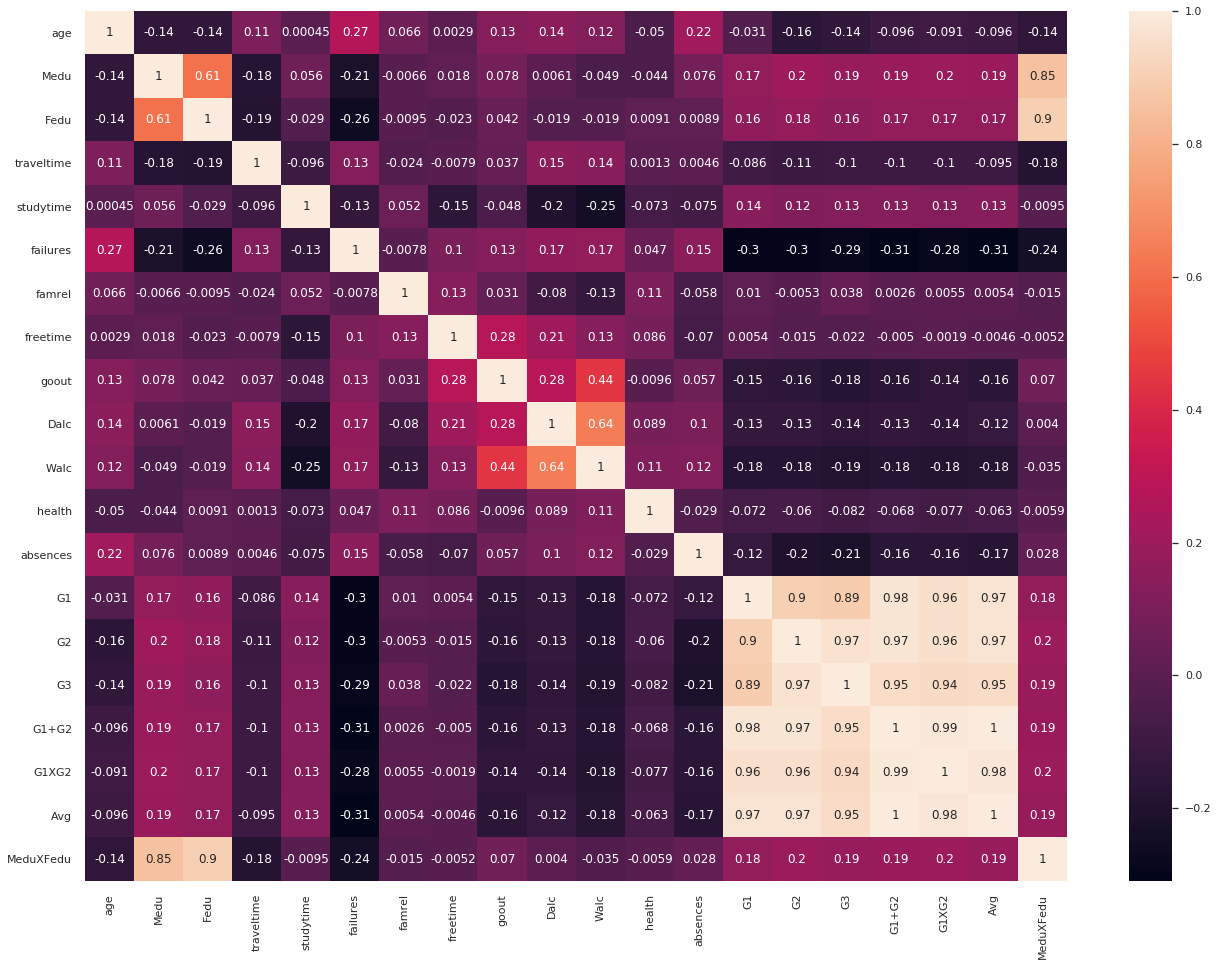

In [219]:
sns.heatmap(df.corr(), annot = True)

# Building Linear Models

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot

In [299]:
class makeModel:
    def __init__(self,name, X,y):
        self.name = name
        self.X = X
        self.y = y
        self.linear_model, self.fX_train, self.fX_test, self.fy_train, self.fy_test = make_model(self.X, self.y)
        self.y_pred =  self.linear_model.predict(self.fX_test)
        self.rmse = np.sqrt(mean_squared_error(self.fy_test, self.y_pred))
        self.R2_value = r2_score(self.y_pred, self.fy_test)
        self.linear_score = self.linear_model.score(self.fX_test, self.fy_test)
        self.model_tuple = (self.linear_model, self.fX_train, self.fX_test, self.fy_train, self.fy_test)


    def make_model(self, X, y):
        best_linear_score = 0
        best_lm = LinearRegression()
        for _ in range(10000):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.66)
            lm = LinearRegression().fit(X_train, y_train)
            current_best_score = lm.score(X_test, y_test) 
            if current_best_score > best_linear_score:
                best_linear_score = current_best_score
                #with open("student_grade_pred_model.pickle", "wb") as f:
                    #pickle.dump(lm, f)
                #y_pred_lm = lm.predict(X_test)
                fX_train, fX_test, fy_train, fy_test = X_train, X_test, y_train, y_test
                best_lm = lm
        return best_lm, fX_train, fX_test, fy_train, fy_test
    
    

In [300]:
def visualize_error(lm, X_train, X_test, y_train, y_test):
    #Visualiztion of Error
    vis = PredictionError(lm).fit(X_train, y_train)
    vis.score(X_test, y_test)
    vis.poof()

# Creating & Evaluating A Model

In [301]:
y = df.G3

In [307]:
X1 = df[["G2","G1+G2", "Avg", "studytime", "traveltime"]]
X2 = df[["G2","G1+G2", "Avg", "studytime", "traveltime", "MeduXFedu"]]
X3 = df[["G2", "G1XG2", "MeduXFedu"]]
X4 = df[["G2","G1XG2", "Avg", "studytime", "traveltime"]]
X5 = df[["G1", "G2","health","absences","MeduXFedu"]]
X6 = df[["G1", "G2","health","absences", "studytime", "MeduXFedu", "traveltime"]] 
X7 = df[["G1+G2","G1", "G2","health","absences", "studytime", "MeduXFedu", "traveltime"]]

In [291]:
model_1 = makeModel("Model 1", X1, y)

In [303]:
model_2 = makeModel("Model 2", X2, y)

In [304]:
model_3 = makeModel("Model 3", X3, y)

In [305]:
model_4 = makeModel("Model 4", X4, y)

In [306]:
model_5 = makeModel("Model 5", X5, y)

In [308]:
model_6 = makeModel("Model 6", X6, y)

In [309]:
model_7 = makeModel("Model 7", X7, y)

In [310]:
models_list =[model_1, model_2, model_3, model_4, model_5, model_6, model_7]

# Choosing The Best Model 

In [312]:
models_list.sort(reverse=True, key= lambda x: (x.linear_score, x.rmse))

In [315]:
for _ in models_list:
    print(_.name,"Linear Score: ",  _.linear_score,"RMSE: ", _.rmse)

Model 1 Linear Score:  0.9664634269958728 RMSE:  0.6518978743349119
Model 5 Linear Score:  0.9643297466567712 RMSE:  0.6447672231381428
Model 2 Linear Score:  0.9612757945675111 RMSE:  0.6709957021947441
Model 4 Linear Score:  0.9609098576203899 RMSE:  0.6693046574662596
Model 7 Linear Score:  0.96003559714105 RMSE:  0.7067122917439882
Model 3 Linear Score:  0.9600157513361621 RMSE:  0.6883734021319233
Model 6 Linear Score:  0.9597284818876667 RMSE:  0.687638506011482


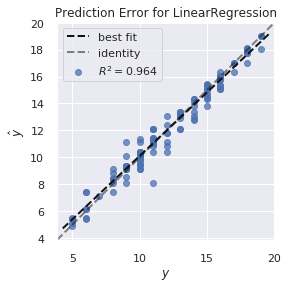

RMSE:  0.6518978743349119
R^2:  0.9644273860086022
Linear Score:  0.9664634269958728


In [316]:
m = model_1
visualize_error(*m.model_tuple)
print("RMSE: ", m.rmse)
print("R^2: ", m.R2_value)
print("Linear Score: ", m.linear_score)